# Solutions to PS1

## Problem 1: Tensors and Automatic Differentiation

In [44]:
# Import Packages 
import torch

### 1a)

In [45]:
# Create the first tensor 
a = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
print(a)

#Create the second tensor 
B = torch.ones(3,3)
print(B)

tensor([1., 2., 3., 4., 5.])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [46]:
# Reshape t1 
a_r = a.reshape(5,1)
print(a_r)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])


In [47]:
# Square a 
a_sq = a **2 
print(a_sq)

tensor([ 1.,  4.,  9., 16., 25.])


In [48]:
# Matrix Product of B
B_B = B@B
print(B_B)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


### 1b)

In [49]:
# Computing the differential of f(x) analytically: 
# f'(x) = 2x+3
# f'(2) = 7

In [50]:
# Creating tensor and computing y 
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2 + 3*x + 1

In [51]:
# Call y backwards and compute the gradient 
y.backward()

In [52]:
# Print the Computed Gradient
print(x.grad.item())

7.0


### 1c)

In [53]:
# Computing the partial differentials of g(x,y) analytically: 
# dg/dx = 2xy, at (1,2) is 4
# dy/dy = x**2 + 3y**2, at (1,2) is 13

In [54]:
# Compute both partial derivatives at (1,2)
x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)
g = x**2 * y +y ** 3
g.backward()

print(x.grad.item())
print(y.grad.item())

4.0
13.0


## Problem 2: Linear Regression in PyTorch

In [55]:
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### 2a)

In [56]:
# Generate synthetic data for linear regression
torch.manual_seed(0)
n_samples = 100
true_weight = 3.5
true_bias = 1.2
X = torch.randn(n_samples, 1)
y = true_weight * X + true_bias + 0.3 * torch.randn(n_samples, 1)

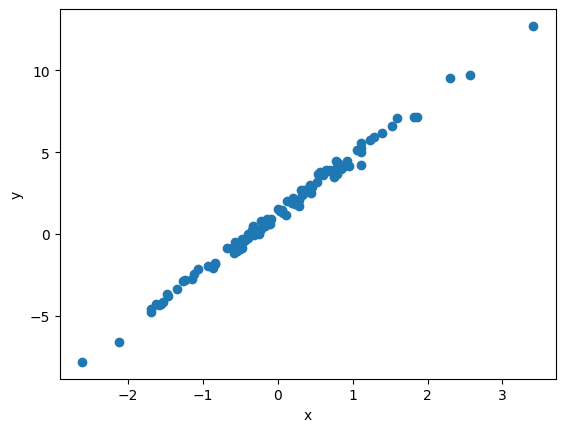

In [57]:
# Visualise the Data 
plt.scatter(X.numpy(), y.numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [58]:
# Create a linear regression model 
model = nn.Linear(in_features=1, out_features=1)
print(f"Initial random weight: {model.weight.data}")
print(f"Initial random bias: {model.bias.data}")

Initial random weight: tensor([[0.1248]])
Initial random bias: tensor([0.8957])


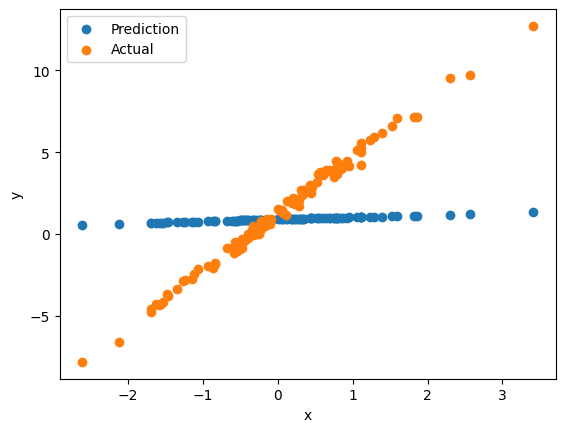

In [59]:
# Generate predicted X and plot 
y_hat = model(X)
plt.scatter(X.detach().numpy(), y_hat.detach().numpy(), label = "Prediction")
plt.scatter(X.numpy(), y.numpy(), label = "Actual")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### 2b)

Epoch: 0, Loss: 12.005885124206543
Epoch: 1, Loss: 7.4878716468811035
Epoch: 2, Loss: 4.681875705718994
Epoch: 3, Loss: 2.9387705326080322
Epoch: 4, Loss: 1.8556911945343018
Epoch: 5, Loss: 1.1825587749481201
Epoch: 6, Loss: 0.7641043663024902
Epoch: 7, Loss: 0.5039052367210388
Epoch: 8, Loss: 0.34206831455230713
Epoch: 9, Loss: 0.2413826584815979
Epoch: 10, Loss: 0.17872430384159088
Epoch: 11, Loss: 0.13971970975399017
Epoch: 12, Loss: 0.11543236672878265
Epoch: 13, Loss: 0.10030447691679001
Epoch: 14, Loss: 0.09087882936000824
Epoch: 15, Loss: 0.08500409126281738
Epoch: 16, Loss: 0.08134134113788605
Epoch: 17, Loss: 0.07905689626932144
Epoch: 18, Loss: 0.0776316374540329
Epoch: 19, Loss: 0.07674209773540497
Epoch: 20, Loss: 0.07618669420480728
Epoch: 21, Loss: 0.07583976536989212
Epoch: 22, Loss: 0.07562302052974701
Epoch: 23, Loss: 0.07548755407333374
Epoch: 24, Loss: 0.07540280371904373
Epoch: 25, Loss: 0.07534980028867722
Epoch: 26, Loss: 0.0753166452050209
Epoch: 27, Loss: 0.0752

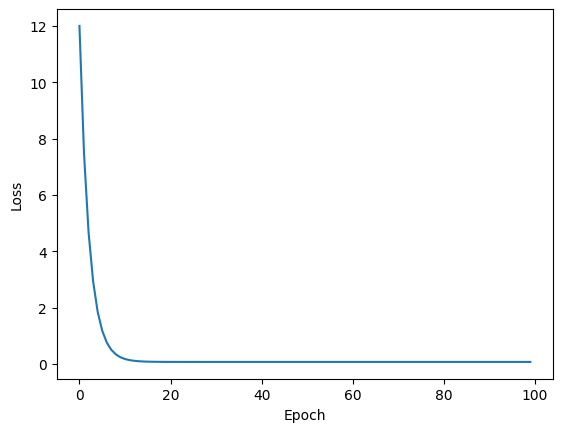

In [60]:
# Training Loop to fit the model 
criteria = nn.MSELoss() 
optimizer = optim.SGD(model.parameters(), lr=0.1)
n_epochs = 100 
loss_array = []

for epoch in range(n_epochs):
    # 1. Forward pass: compute predictions
    y_hat = model(X)
    # 2. Compute loss
    loss = criteria(y_hat,y)
    # 3. Zero gradients: optimizer.zero_grad()
    optimizer.zero_grad()
    # 4. Backward pass: loss.backward()
    loss.backward()
    # 5. Update parameters: optimizer.step()
    optimizer.step()

    #Store Loss History]
    loss_array.append(loss.item())
    print(f"Epoch: {epoch}, Loss: {loss}")

# Plot the Loss Curve 
plt.plot(loss_array)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### 2c)

In [61]:
print(f"Learned weight: {model.weight.item()}")
print(f"Learned bias: {model.bias.item()}")

Learned weight: 3.4643068313598633
Learned bias: 1.2479041814804077


In [62]:
# Calculate Analytical OLS Solution

# Create new X
ones  = torch.ones(X.shape[0],1)
X_new = torch.cat([X,ones], dim = 1)

# Calculate 
XTX = X_new.T @ X_new
XTy = X_new.T @ y
beta_hat = torch.linalg.solve(XTX, XTy)

w_ols = beta_hat[0].item()
b_ols = beta_hat[1].item()
print(f"Analytical weight: {w_ols}")
print(f"Analytical bias: {b_ols}")

print(f"Learned weight: {model.weight.item()}")
print(f"Learned bias: {model.bias.item()}")

print("Actual Weight: 3.5")
print("Actual Bias: 1.2")

Analytical weight: 3.4643070697784424
Analytical bias: 1.247903823852539
Learned weight: 3.4643068313598633
Learned bias: 1.2479041814804077
Actual Weight: 3.5
Actual Bias: 1.2


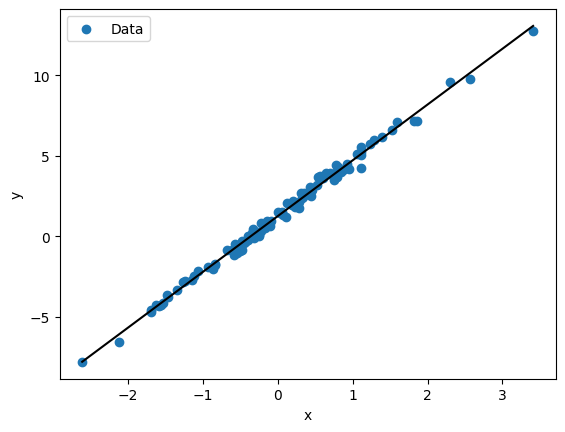

In [63]:
# Plot Learned Regression Line 
x_min = X.min().item()
x_max = X.max().item()
x_line = torch.tensor([[x_min],[x_max]])
y_line = model.weight.item() * x_line + model.bias.item()
plt.scatter(X.numpy(), y.numpy(), label = "Data")
plt.plot(x_line.numpy(), y_line.numpy(), color = "Black")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### 2d)

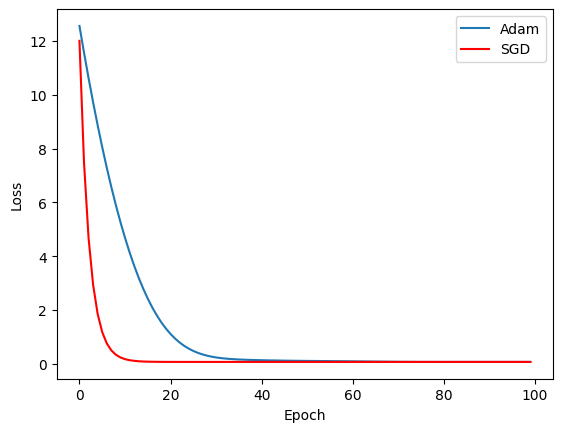

In [64]:
# Training Loop to fit the model with optim.Adam
model_adam = nn.Linear(in_features=1, out_features=1)
criteria = nn.MSELoss() 
optimizer = optim.Adam(model_adam.parameters(), lr=0.1)
n_epochs = 100 
loss_array_adam = []

for epoch in range(n_epochs):
    # 1. Forward pass: compute predictions
    y_hat = model_adam(X)
    # 2. Compute loss
    loss = criteria(y_hat,y)
    # 3. Zero gradients: optimizer.zero_grad()
    optimizer.zero_grad()
    # 4. Backward pass: loss.backward()
    loss.backward()
    # 5. Update parameters: optimizer.step()
    optimizer.step()
    #Store Loss History]
    loss_array_adam.append(loss.item())

# Plot the Loss Curve 
plt.plot(loss_array_adam, label = "Adam")
plt.plot(loss_array, label = "SGD", color = "Red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# From the graph above, SGD converges faster 

## Problem 3: Multi-Layer Perceptron on MNIST

### 3a)

100.0%
100.0%
100.0%
100.0%


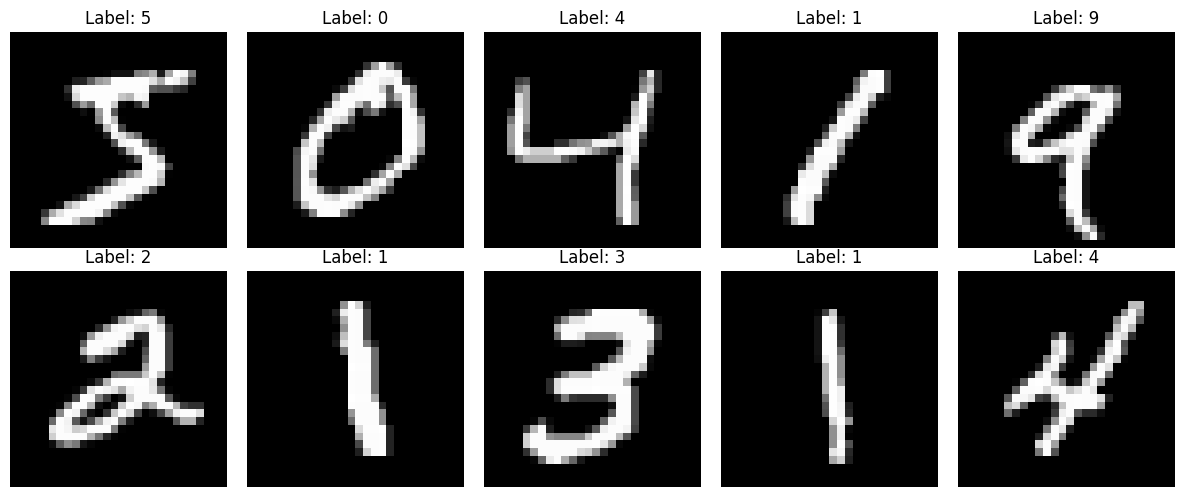

Training samples: 60000
Test samples: 10000
Image shape: torch.Size([1, 28, 28])


In [67]:
# Copy the code from the question
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# Load MNIST dataset
transform = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.1307,), (0.3081,)) # MNIST mean and std
])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)
# Visualize some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.tight_layout()
plt.show()
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")


In [70]:
# Building the MLP

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,10)
)

print(model)

total_params = sum(e.numel() for e in model.parameters() if e.requires_grad)
print(total_params)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=10, bias=True)
)
235146


### 3b)

In [76]:
# Helper Function
def compute_accuracy(model, data_loader):
    model.eval() # Sets evaluation mode (disables dropout/batchnorm training behavior)
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [83]:
# Define and train the model 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
n_epochs = 5

# Define the device 
device = torch.device("cpu")
model = model.to(device)

hist_loss = []
hist_train_acc = []
hist_test_acc = []

for epoch in range (n_epochs):
    model.train()
    total_loss = 0.0 
    num_samples = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_size = labels.size(0)
        total_loss += loss.item() * batch_size
        num_samples += batch_size
    avg_training_loss = total_loss / num_samples
    train_acc = compute_accuracy(model, train_loader)
    test_acc = compute_accuracy(model, test_loader)

    hist_loss.append(avg_training_loss)
    hist_train_acc.append(train_acc)
    hist_test_acc.append(test_acc)

    print(f"For Epoch: {epoch + 1} | "
          f"Average Training Loss: {avg_training_loss} | "
          f"Training Accuracy: {train_acc} | "
          f"Test Accuracy: {test_acc} | ")

For Epoch: 1 | Average Training Loss: 0.018475061781547022 | Training Accuracy: 99.64 | Test Accuracy: 98.19 | 
For Epoch: 2 | Average Training Loss: 0.01193652874539912 | Training Accuracy: 99.595 | Test Accuracy: 97.77 | 
For Epoch: 3 | Average Training Loss: 0.01364871029532951 | Training Accuracy: 99.58333333333333 | Test Accuracy: 97.83 | 
For Epoch: 4 | Average Training Loss: 0.013313553773724804 | Training Accuracy: 99.2 | Test Accuracy: 97.72 | 
For Epoch: 5 | Average Training Loss: 0.014532258254186975 | Training Accuracy: 99.72 | Test Accuracy: 98.08 | 


### 3c)

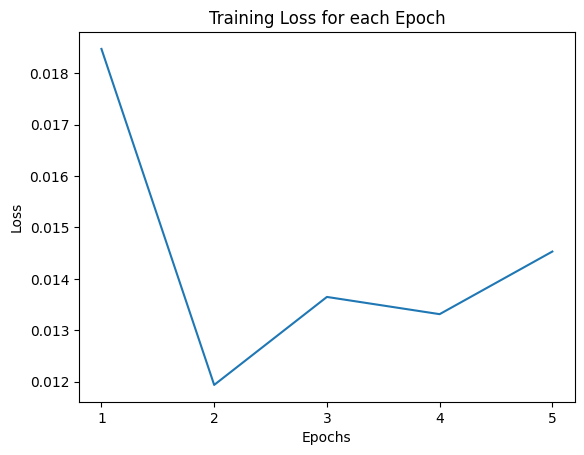

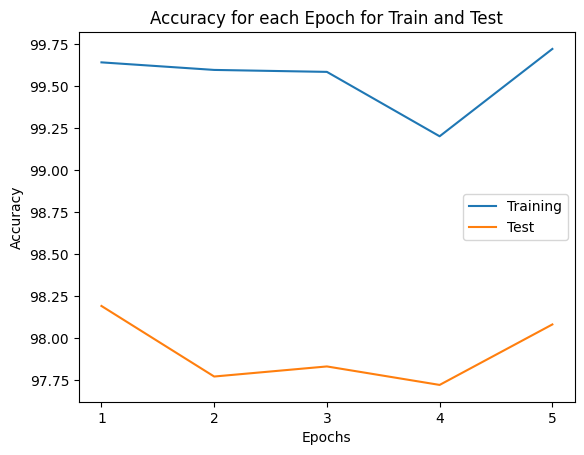

In [89]:
# Plot training loss and accuracies 

epochs = [1,2,3,4,5]
plt.figure()
plt.plot(epochs, hist_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss for each Epoch")
plt.xticks(epochs)
plt.show()

plt.figure()
plt.plot(epochs, hist_train_acc, label = "Training")
plt.plot(epochs, hist_test_acc, label = "Test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy for each Epoch for Train and Test")
plt.xticks(epochs)
plt.legend()
plt.show()

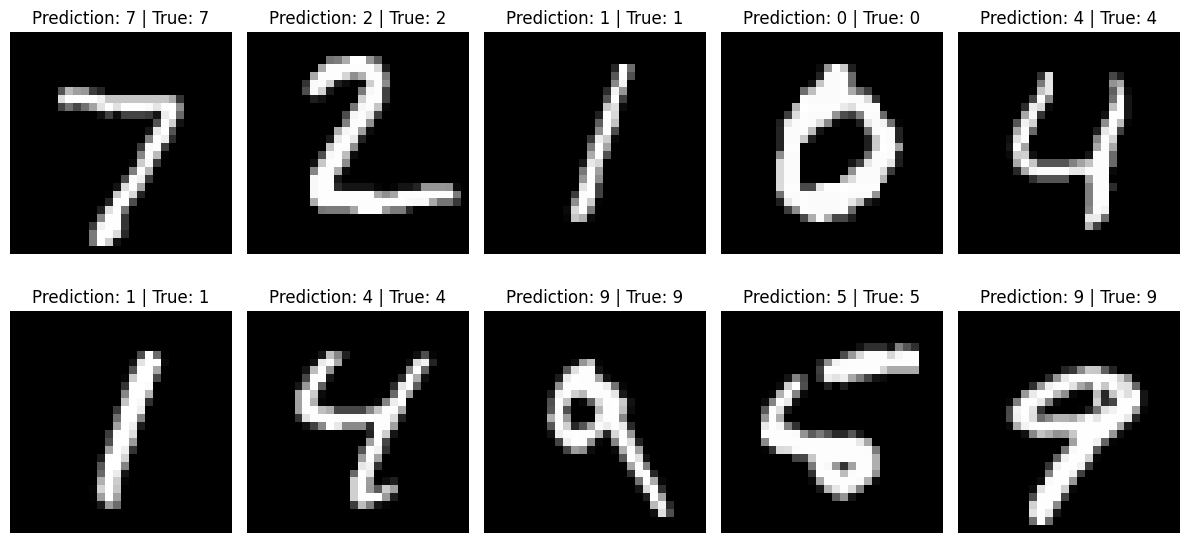

In [98]:
# Display 10 test images 
model.eval()

images, labels = next(iter(test_loader))

with torch.no_grad():
    outputs = model(images)
    preds = outputs.argmax(dim=1)

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = images[i]
    true = labels[i].item()
    pred = preds[i].item()

    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f"Prediction: {pred} | True: {true}", 
                 color = ("red" if pred != true else "black"))
    ax.axis('off')
plt.tight_layout()
plt.show()

In [100]:
print(f"The test accuracy was: {test_acc}%. This is well above the 10% accuracy that we would get from randomly guessing.")

The test accuracy was: 98.08%. This is well above the 10% accuracy that we would get from randomly guessing.
